In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [58]:
iris = load_iris(as_frame=True)

In [59]:
iris_frame = pd.DataFrame(iris.data)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
#удаляем третий класс setosa
iris_frame = iris_frame.loc[(iris_frame['name'] != 'setosa')]
# Смотрим, что получилось:
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [60]:
iris_frame['target'].replace({1: 0, 2: 1}, inplace=True)

In [61]:
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
50,7.0,3.2,4.7,1.4,0,versicolor
51,6.4,3.2,4.5,1.5,0,versicolor
52,6.9,3.1,4.9,1.5,0,versicolor
53,5.5,2.3,4.0,1.3,0,versicolor
54,6.5,2.8,4.6,1.5,0,versicolor
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1,virginica
146,6.3,2.5,5.0,1.9,1,virginica
147,6.5,3.0,5.2,2.0,1,virginica
148,6.2,3.4,5.4,2.3,1,virginica


In [62]:
X = iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)', 'petal width (cm)']].to_numpy()
y = iris_frame['target'].to_numpy() #таргет
X, y

(array([[7. , 3.2, 4.7, 1.4],
        [6.4, 3.2, 4.5, 1.5],
        [6.9, 3.1, 4.9, 1.5],
        [5.5, 2.3, 4. , 1.3],
        [6.5, 2.8, 4.6, 1.5],
        [5.7, 2.8, 4.5, 1.3],
        [6.3, 3.3, 4.7, 1.6],
        [4.9, 2.4, 3.3, 1. ],
        [6.6, 2.9, 4.6, 1.3],
        [5.2, 2.7, 3.9, 1.4],
        [5. , 2. , 3.5, 1. ],
        [5.9, 3. , 4.2, 1.5],
        [6. , 2.2, 4. , 1. ],
        [6.1, 2.9, 4.7, 1.4],
        [5.6, 2.9, 3.6, 1.3],
        [6.7, 3.1, 4.4, 1.4],
        [5.6, 3. , 4.5, 1.5],
        [5.8, 2.7, 4.1, 1. ],
        [6.2, 2.2, 4.5, 1.5],
        [5.6, 2.5, 3.9, 1.1],
        [5.9, 3.2, 4.8, 1.8],
        [6.1, 2.8, 4. , 1.3],
        [6.3, 2.5, 4.9, 1.5],
        [6.1, 2.8, 4.7, 1.2],
        [6.4, 2.9, 4.3, 1.3],
        [6.6, 3. , 4.4, 1.4],
        [6.8, 2.8, 4.8, 1.4],
        [6.7, 3. , 5. , 1.7],
        [6. , 2.9, 4.5, 1.5],
        [5.7, 2.6, 3.5, 1. ],
        [5.5, 2.4, 3.8, 1.1],
        [5.5, 2.4, 3.7, 1. ],
        [5.8, 2.7, 3.9, 1.2],
        [6

In [63]:
#нормируем
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X.mean(axis=0), X.std(axis=0)

(array([-6.68354261e-16,  1.62425629e-15,  3.26960681e-16, -1.44384504e-15]),
 array([1., 1., 1., 1.]))

In [64]:
#своя релизация
X = np.c_[np.ones(len(X)), X]
X

array([[ 1.        ,  1.11900931,  0.99068792, -0.25077906, -0.65303909],
       [ 1.        ,  0.20924564,  0.99068792, -0.49425387, -0.41643072],
       [ 1.        ,  0.96738203,  0.68864892, -0.00730424, -0.41643072],
       [ 1.        , -1.15539985, -1.72766308, -1.10294091, -0.88964745],
       [ 1.        ,  0.36087292, -0.21746808, -0.37251647, -0.41643072],
       [ 1.        , -0.8521453 , -0.21746808, -0.49425387, -0.88964745],
       [ 1.        ,  0.05761837,  1.29272692, -0.25077906, -0.17982236],
       [ 1.        , -2.06516352, -1.42562408, -1.95510276, -1.59947255],
       [ 1.        ,  0.5125002 ,  0.08457092, -0.37251647, -0.88964745],
       [ 1.        , -1.61028169, -0.51950708, -1.22467832, -0.65303909],
       [ 1.        , -1.91353624, -2.63378009, -1.71162795, -1.59947255],
       [ 1.        , -0.54889074,  0.38660992, -0.8594661 , -0.41643072],
       [ 1.        , -0.39726347, -2.02970209, -1.10294091, -1.59947255],
       [ 1.        , -0.24563619,  0.0

In [65]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def logloss(y, y_proba):
    logloss_1 = np.sum(np.log(y_proba[y == 1] + 1e-30))
    logloss_0 = np.sum(np.log(1 - y_proba[y == 0] + 1e-30))
    logloss_total = -(logloss_0 + logloss_1) / len(y)
    return logloss_total


def gr_logloss(X, W, y):
    y_proba = sigmoid(X @ W)
    grad = X.T @ (y_proba - y)
    return grad

In [80]:
# первоначальное точка
np.random.seed(8)
W = np.random.randn(X.shape[1])

# размер шага (learning rate)
learning_rate = 0.0015

next_W = W

# количество итерация 
n = 1001
for i in range(n):
    cur_W = next_W

    # движение в негативную сторону вычисляемого градиента
    next_W = cur_W - learning_rate * gr_logloss(X, W, y)

    if i % 5 == 0:
        print(f"Итерация: {i}")
        print(f"Текущая точка {cur_W}| Следующая точка {next_W}")
        y_proba = sigmoid(X @ next_W)
        y_class = np.where(y_proba >= 0.5, 1, 0)
        accuracy = (y_class == y).sum() / len(y)
        print(f"Logloss {logloss(y, y_proba)}")
        print(f"Accuracy {accuracy}")
        print("--------------------------------------------------------") 

Итерация: 0
Текущая точка [ 0.09120472  1.09128273 -1.94697031 -1.38634953 -2.29649157]| Следующая точка [ 0.08953198  1.16229629 -1.88378569 -1.27926621 -2.17862166]
Logloss 3.138976952645138
Accuracy 0.14
--------------------------------------------------------
Итерация: 5
Текущая точка [ 0.08284103  1.44635051 -1.63104723 -0.85093293 -1.70714202]| Следующая точка [ 0.08116829  1.51736407 -1.56786261 -0.74384961 -1.5892721 ]
Logloss 2.065077472587398
Accuracy 0.19
--------------------------------------------------------
Итерация: 10
Текущая точка [ 0.07447735  1.8014183  -1.31512415 -0.31551633 -1.11779246]| Следующая точка [ 0.07280461  1.87243185 -1.25193953 -0.20843301 -0.99992255]
Logloss 1.1936716571067874
Accuracy 0.35
--------------------------------------------------------
Итерация: 15
Текущая точка [ 0.06611366  2.15648608 -0.99920106  0.21990027 -0.5284429 ]| Следующая точка [ 0.06444093  2.22749963 -0.93601645  0.32698359 -0.41057299]
Logloss 0.6828532362194093
Accuracy 0.

In [81]:
cur_W

array([ -1.58153224,  72.10483896,  61.23764605, 105.69697091,
       115.57342009])

In [82]:
#предсказания своей модели
y_class

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [83]:
#истинные значения
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [84]:
#точность модели
accuracy

0.88

In [281]:
import pandas as pd

df = ({
    'X': np.squeeze(X),
    'y': y,
    'pred_sk_model': sigmoid(np.squeeze(model_a * X + model_b)),
    'pred_my_model': sigmoid(np.squeeze(a * X + b))
})

df

{'X': array([[ 1.        ,  1.11900931,  0.99068792, -0.25077906, -0.65303909],
        [ 1.        ,  0.20924564,  0.99068792, -0.49425387, -0.41643072],
        [ 1.        ,  0.96738203,  0.68864892, -0.00730424, -0.41643072],
        [ 1.        , -1.15539985, -1.72766308, -1.10294091, -0.88964745],
        [ 1.        ,  0.36087292, -0.21746808, -0.37251647, -0.41643072],
        [ 1.        , -0.8521453 , -0.21746808, -0.49425387, -0.88964745],
        [ 1.        ,  0.05761837,  1.29272692, -0.25077906, -0.17982236],
        [ 1.        , -2.06516352, -1.42562408, -1.95510276, -1.59947255],
        [ 1.        ,  0.5125002 ,  0.08457092, -0.37251647, -0.88964745],
        [ 1.        , -1.61028169, -0.51950708, -1.22467832, -0.65303909],
        [ 1.        , -1.91353624, -2.63378009, -1.71162795, -1.59947255],
        [ 1.        , -0.54889074,  0.38660992, -0.8594661 , -0.41643072],
        [ 1.        , -0.39726347, -2.02970209, -1.10294091, -1.59947255],
        [ 1.        

In [ ]:
df['sk_class'] = (df['pred_sk_model'] > 0.5).astype('int')
df['my_class'] = (df['pred_my_model'] > 0.5).astype('int')
df.head()

In [246]:
X

array([[1. , 7. , 3.2, 4.7, 1.4],
       [1. , 6.4, 3.2, 4.5, 1.5],
       [1. , 6.9, 3.1, 4.9, 1.5],
       [1. , 5.5, 2.3, 4. , 1.3],
       [1. , 6.5, 2.8, 4.6, 1.5],
       [1. , 5.7, 2.8, 4.5, 1.3],
       [1. , 6.3, 3.3, 4.7, 1.6],
       [1. , 4.9, 2.4, 3.3, 1. ],
       [1. , 6.6, 2.9, 4.6, 1.3],
       [1. , 5.2, 2.7, 3.9, 1.4],
       [1. , 5. , 2. , 3.5, 1. ],
       [1. , 5.9, 3. , 4.2, 1.5],
       [1. , 6. , 2.2, 4. , 1. ],
       [1. , 6.1, 2.9, 4.7, 1.4],
       [1. , 5.6, 2.9, 3.6, 1.3],
       [1. , 6.7, 3.1, 4.4, 1.4],
       [1. , 5.6, 3. , 4.5, 1.5],
       [1. , 5.8, 2.7, 4.1, 1. ],
       [1. , 6.2, 2.2, 4.5, 1.5],
       [1. , 5.6, 2.5, 3.9, 1.1],
       [1. , 5.9, 3.2, 4.8, 1.8],
       [1. , 6.1, 2.8, 4. , 1.3],
       [1. , 6.3, 2.5, 4.9, 1.5],
       [1. , 6.1, 2.8, 4.7, 1.2],
       [1. , 6.4, 2.9, 4.3, 1.3],
       [1. , 6.6, 3. , 4.4, 1.4],
       [1. , 6.8, 2.8, 4.8, 1.4],
       [1. , 6.7, 3. , 5. , 1.7],
       [1. , 6. , 2.9, 4.5, 1.5],
       [1. , 5

In [245]:
np.squeeze(X)

array([[1. , 7. , 3.2, 4.7, 1.4],
       [1. , 6.4, 3.2, 4.5, 1.5],
       [1. , 6.9, 3.1, 4.9, 1.5],
       [1. , 5.5, 2.3, 4. , 1.3],
       [1. , 6.5, 2.8, 4.6, 1.5],
       [1. , 5.7, 2.8, 4.5, 1.3],
       [1. , 6.3, 3.3, 4.7, 1.6],
       [1. , 4.9, 2.4, 3.3, 1. ],
       [1. , 6.6, 2.9, 4.6, 1.3],
       [1. , 5.2, 2.7, 3.9, 1.4],
       [1. , 5. , 2. , 3.5, 1. ],
       [1. , 5.9, 3. , 4.2, 1.5],
       [1. , 6. , 2.2, 4. , 1. ],
       [1. , 6.1, 2.9, 4.7, 1.4],
       [1. , 5.6, 2.9, 3.6, 1.3],
       [1. , 6.7, 3.1, 4.4, 1.4],
       [1. , 5.6, 3. , 4.5, 1.5],
       [1. , 5.8, 2.7, 4.1, 1. ],
       [1. , 6.2, 2.2, 4.5, 1.5],
       [1. , 5.6, 2.5, 3.9, 1.1],
       [1. , 5.9, 3.2, 4.8, 1.8],
       [1. , 6.1, 2.8, 4. , 1.3],
       [1. , 6.3, 2.5, 4.9, 1.5],
       [1. , 6.1, 2.8, 4.7, 1.2],
       [1. , 6.4, 2.9, 4.3, 1.3],
       [1. , 6.6, 3. , 4.4, 1.4],
       [1. , 6.8, 2.8, 4.8, 1.4],
       [1. , 6.7, 3. , 5. , 1.7],
       [1. , 6. , 2.9, 4.5, 1.5],
       [1. , 5

In [ ]:
(df['y'] == df['pred_cl']).mean()

____________________________________________

In [163]:
#одномерная логистическая регрессия
#Обучение LogisticRegression из sklearn
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=25, n_features=1, n_informative=1,
                           n_redundant=0, random_state=11, n_clusters_per_class=1,
                           class_sep=0.5)

display(X, y)

array([[-9.63053606e-01],
       [-1.53720110e+00],
       [ 2.95922249e-01],
       [-9.71649853e-01],
       [-9.01716913e-02],
       [ 1.20282593e+00],
       [ 2.61344337e-01],
       [-1.02232640e+00],
       [-1.73175565e-03],
       [ 5.10064969e-01],
       [ 1.71299974e-01],
       [-8.11112121e-01],
       [-3.08259876e+00],
       [-1.93003866e-01],
       [ 9.22856588e-01],
       [ 2.64934732e-01],
       [-5.08063816e-01],
       [ 7.21362827e-01],
       [ 8.62588970e-01],
       [-1.00112228e-02],
       [-1.36261842e+00],
       [ 1.45134414e-01],
       [ 6.00269365e-01],
       [-7.78448196e-01],
       [ 3.18234399e-01]])

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1])

In [164]:
#смотрим стандартное отклонение и среднее, чтобы понять, нужно ли нормировать
X.mean(axis=0), X.std(axis=0)

(array([-0.20220608]), array([0.93263678]))

In [165]:
#нормируем, проверяем
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.mean(axis=0), X.std(axis=0)

(array([2.22044605e-17]), array([1.]))

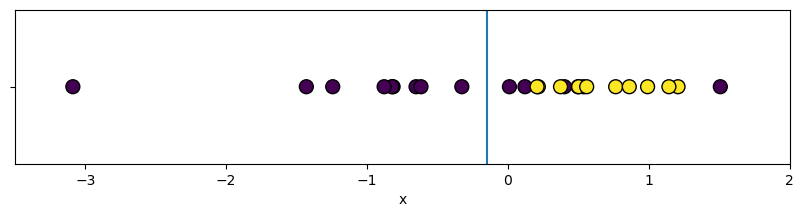

In [166]:
plt.figure(figsize=(10, 2))
plt.scatter(X, np.zeros(X.shape[0]), c=y, s=100, edgecolors='black')
plt.plot([-0.15, -0.15], [-1, 1])
plt.ylabel('');plt.xlabel('x')
plt.yticks(np.arange(0, 1), [''])
plt.ylim(-1, 1);plt.xlim(-3.5, 2);

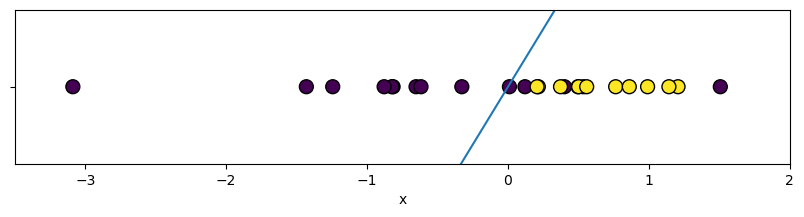

In [167]:
#добавим наклон. без наклона нельзя использовать как линейную регрессию
plt.figure(figsize=(10, 2))
plt.scatter(X, np.zeros(X.shape[0]), c=y, s=100, edgecolors='black')

x = np.linspace(-3, 3)
plt.plot(x, 3*x + 0)
plt.ylabel('');plt.xlabel('x')
plt.yticks(np.arange(0, 1), [''])
plt.ylim(-1, 1);plt.xlim(-3.5, 2);

Возьмем модель `LogisticRegression` из `sklearn` из модуля `linear_model`.

In [168]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model

LogisticRegression()

In [169]:
model.fit(X, y)

LogisticRegression()

In [170]:
model.coef_, model.intercept_

(array([[1.57007133]]), array([-0.24406472]))

In [171]:
model_a = model.coef_[0]
model_b = model.intercept_

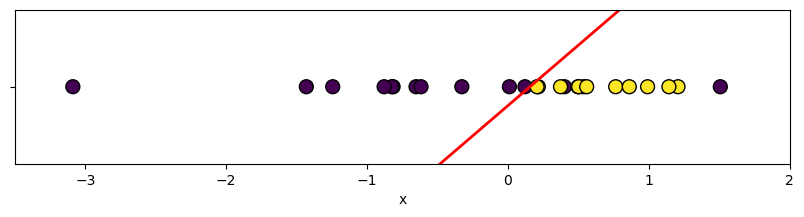

In [172]:
#псевдо-линейная регрессия из склерна, так как мы вручную сами добавили наклон по значениям выше
model_y_sk = model_a * x + model_b #вот тут добавили

plt.figure(figsize=(10, 2))
plt.plot(x, model_y_sk, linewidth=2, c='r')
plt.scatter(X, np.zeros(X.shape[0]), c=y, s=100, edgecolors='black')
plt.ylabel('');plt.xlabel('x')
plt.yticks(np.arange(0, 1), [''])
plt.ylim(-1, 1);plt.xlim(-3.5, 2);

In [173]:
model.score(X, y) #точность модели из склерна

0.92

In [174]:
#предсказание
y_pred_cl = model.predict(X)
y_pred_cl[:5]

array([0, 0, 1, 0, 0])

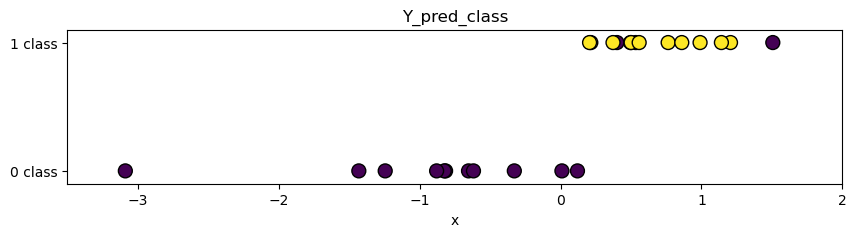

In [175]:
plt.figure(figsize=(10, 2))
plt.scatter(X, y_pred_cl, c=y, s=100, edgecolors='black')
plt.ylabel('');plt.xlabel('x')
plt.yticks(np.arange(0, 2), ['0 class', '1 class'])
plt.ylim(-0.1, 1.1);plt.xlim(-3.5, 2)
plt.title('Y_pred_class');

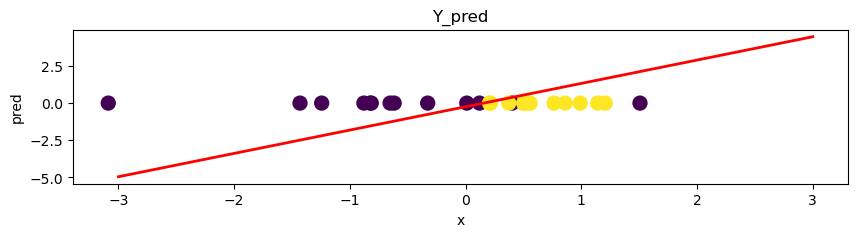

In [176]:
model_y_sk = model_a * x + model_b

plt.figure(figsize=(10, 2))
plt.plot(x, model_y_sk, linewidth=2, c='r')
plt.scatter(X, np.zeros(X.shape[0]), c=y, s=100)
plt.ylabel('pred');plt.xlabel('x')
plt.title('Y_pred');

In [177]:
pred_proba = model.predict_proba(X)
pred_proba[:5]

array([[0.82126374, 0.17873626],
       [0.92354353, 0.07645647],
       [0.35559792, 0.64440208],
       [0.82337815, 0.17662185],
       [0.51386083, 0.48613917]])

In [178]:
pred_proba = pred_proba[:, 1]
pred_proba[:5]

array([0.17873626, 0.07645647, 0.64440208, 0.17662185, 0.48613917])

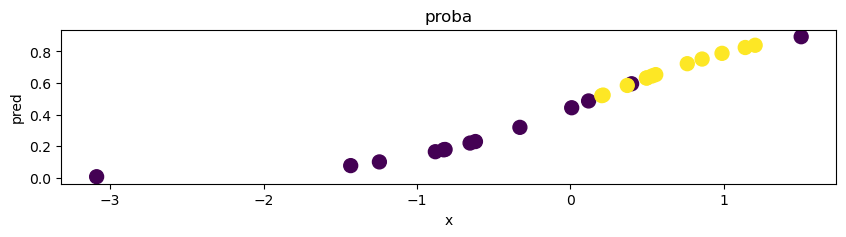

In [179]:
plt.figure(figsize=(10, 2))
plt.scatter(X, pred_proba, c=y, s=100)
plt.ylabel('pred');plt.xlabel('x')
plt.title('proba');

In [180]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

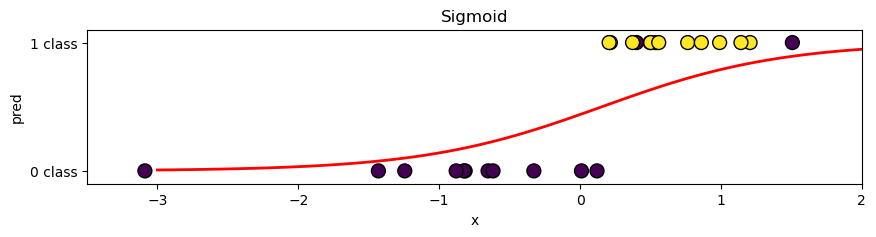

In [181]:
x = np.linspace(-3, 3, num=100)
model_y_sk = model_a * x + model_b

plt.figure(figsize=(10, 2))
plt.plot(x, sigmoid(model_y_sk), linewidth=2, c='r')
plt.scatter(X, y_pred_cl, c=y, s=100, edgecolors='black')
plt.ylabel('pred');plt.xlabel('x')
plt.yticks(np.arange(0, 2), ['0 class', '1 class'])
plt.ylim(-0.1, 1.1);plt.xlim(-3.5, 2)
plt.title('Sigmoid');

____________________________________________________

Самостоятельно реализуйте логистическую регрессию, без использования метода LogisticRegression из библиотеки. Можете использовать библиотеки pandas, numpy, math для реализации. Оформите в виде функции. *Оформите в виде класса с методами.

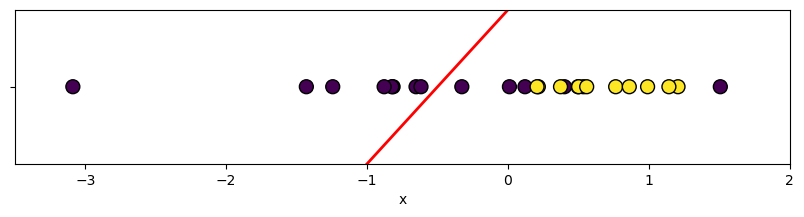

In [182]:
a = 2
b = 1
model_y = a * x + b


plt.figure(figsize=(10, 2))
plt.plot(x, model_y, linewidth=2, c='r')
plt.scatter(X, np.zeros(X.shape[0]), c=y, s=100, edgecolors='black')
plt.ylabel('');plt.xlabel('x')
plt.yticks(np.arange(0, 1), [''])
plt.ylim(-1, 1);plt.xlim(-3.5, 2);

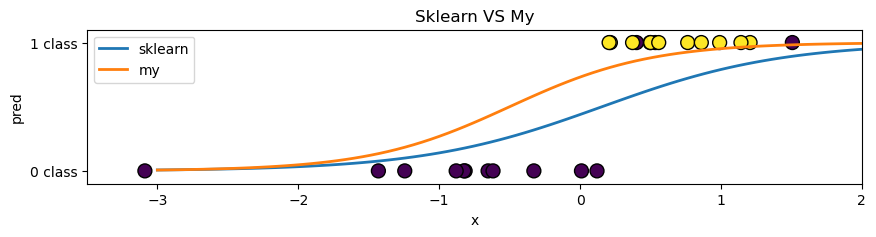

In [183]:
plt.figure(figsize=(10, 2))
plt.plot(x, sigmoid(model_y_sk), linewidth=2, label='sklearn')
plt.plot(x, sigmoid(model_y), linewidth=2, label='my')
plt.scatter(X, y_pred_cl, c=y, s=100, edgecolors='black')
plt.ylabel('pred');plt.xlabel('x')
plt.yticks(np.arange(0, 2), ['0 class', '1 class'])
plt.ylim(-0.1, 1.1);plt.xlim(-3.5, 2)
plt.title('Sklearn VS My')
plt.legend();

In [185]:
df = pd.DataFrame({
    'X': np.squeeze(X),
    'y': y,
    'pred_sk_model': sigmoid(np.squeeze(model_a * X + model_b)),
    'pred_my_model': sigmoid(np.squeeze(a * X + b))
})

df.head()

,X,y,pred_sk_model,pred_my_model
0,-0.815803,0,0.178736,0.347147
1,-1.431420,0,0.076456,0.134372
2,0.534108,1,0.644402,0.887775
3,-0.825020,0,0.176622,0.342981
4,0.120126,0,0.486139,0.775608


In [186]:
df['sk_class'] = (df['pred_sk_model'] > 0.5).astype('int')
df['my_class'] = (df['pred_my_model'] > 0.5).astype('int')
df.head()

,X,y,pred_sk_model,pred_my_model,sk_class,my_class
0,-0.815803,0,0.178736,0.347147,0,0
1,-1.431420,0,0.076456,0.134372,0,0
2,0.534108,1,0.644402,0.887775,1,1
3,-0.825020,0,0.176622,0.342981,0,0
4,0.120126,0,0.486139,0.775608,0,1


<h2>Логистическая регрессия</h2>

<p id="1">Рассмотрим задачу логистической регрессии. В данной задаче ключевую роль играет функция <i><b>сигмоида</b></i> (логистическая функция), которая используется для прогнозирования вероятности возникновения некоторого события по значениям множества признаков:
    </p>   $$\sigma (z) = \frac{1}{1+e^{-z}}\text{  ,  } z \in (-\infty, +\infty) \text{  ,  } \sigma(z) \in (-1, 1)$$
<p style="align: center;"><img align=center src="https://upload.wikimedia.org/wikipedia/commons/a/ac/Logistic-curve.png"  width=400></p>

Как и в задаче линейной регрессии задаем аргумент
$z=\theta^{T}x = \theta_{0} + \theta_{1}x_{1} + ... + \theta_{n}x_n$, где $\theta_{i}$ - параметры модели (веса), а $x_i$ - известные нам признаки.
<p id="2"><h3>Теория. Масимизация правдоподобия</h3>
Чтобы модель могла обучаться, ей необходимо получать "штраф" за то, что она ошибается. Подбираем такой параметр $\theta$, чтобы наша функция правдоподобия $L(\theta)$ была максимальной:
$$\hat{\theta} = argmax_{\theta}L(\theta) = argmax_{\theta} \prod\limits^{m}_{i=1}P(y=y_{i} | x = x_i)$$
</p>
После логарифмирования получаем: 
$$lnL(\theta)=\sum\limits_{i=1}^mlogP(y=y_i | x=x_i) = \sum\limits_{i=1}^m y_i lnf(\theta^Tx_i) + (1-y_i)ln(1-f(\theta^Tx_i))$$
где $y_i$ - индикаторная переменная. Если предсказание верно - $y_i = 1$, то в сумме остается только первый член, а если нет, то второй.

$$\sigma (z) = \frac{1}{1+e^{-z}}\text{  ,  } z \in (-\infty, +\infty) \text{  ,  } \sigma(z) \in (-1, 1)$$

In [252]:
def gr_func(x): #производная функции
    return math.e**(-x)/(1+math.e**(-x))**2

In [253]:
def func(x): #функция
    return 1 / (1+math.e**(-x))

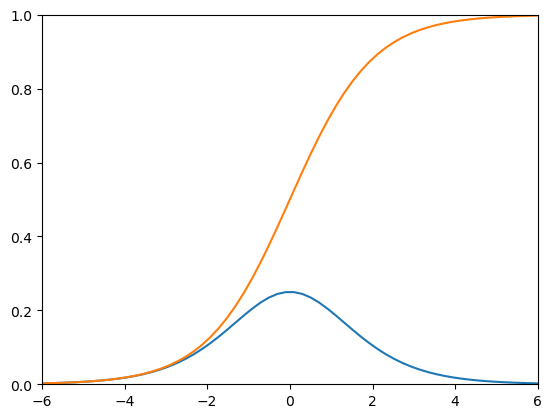

In [105]:
#отрисуем функции
#f = lambda X: 1 / (1+math.e**(-X))
#f_prime = lambda X: math.e**(-z)/(1+math.e**(-z))**2 #производная
#plt.plot(z,f_prime(z))
#X = np.linspace(-10, 10, 100) #начало, конец, количество данных в выборке
#plt.plot(X,f(X))
#plt.xlim([-6,6])
#plt.ylim([0,1])
#plt.show()

#Y = f_prime(X)

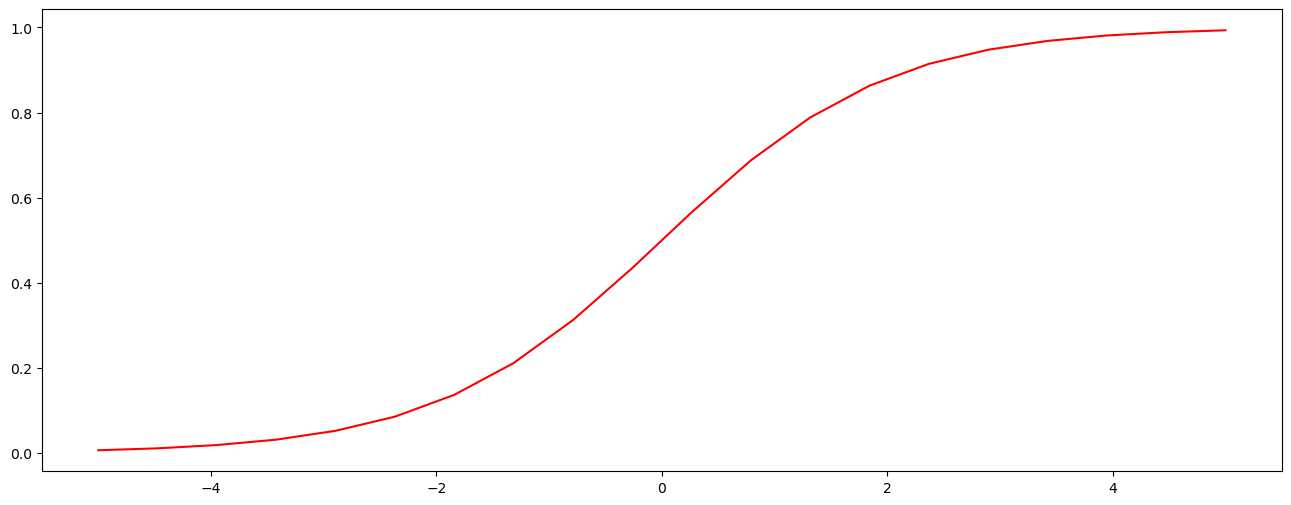

In [261]:
# для картинки
D = 5

X = np.linspace(-D, +D, 20)
Y = func(X)

plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)');

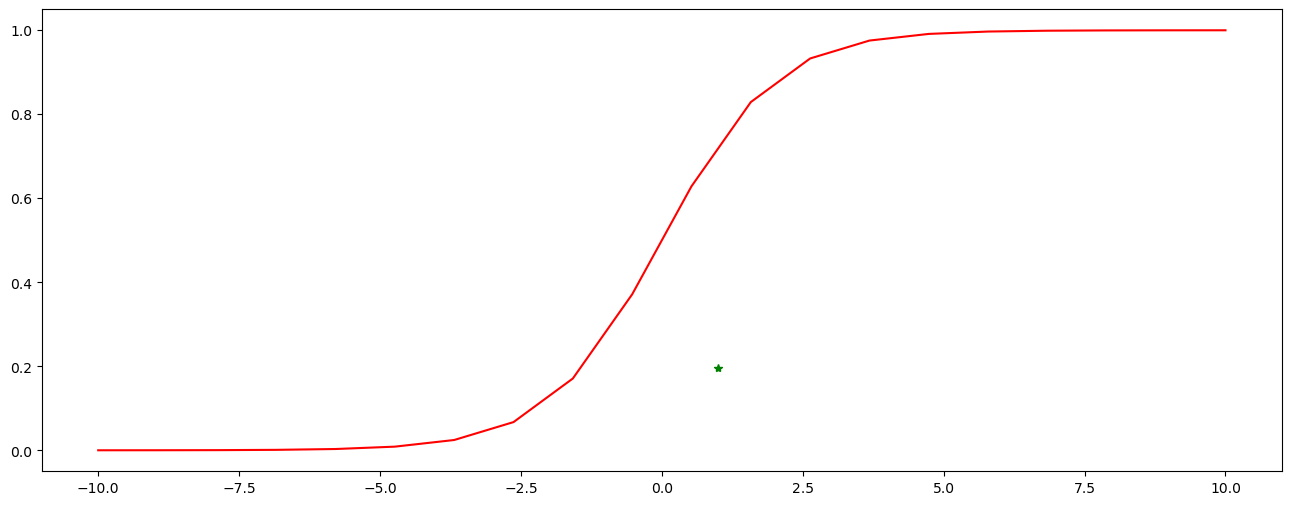

In [262]:
# первоначальное точка
start_point = 1

# для картинки
D = 10

X = np.linspace(-D, +D, 20)
Y = func(X)

plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')
plt.plot(start_point, gr_func(start_point), '-*g', label = 'GD');

Итерация: 0
Текущая точка 1| Следующая точка 0.6067761335170363
--------------------------------------------------------
Итерация: 1
Текущая точка 0.6067761335170363| Следующая точка 0.15011478363767733
--------------------------------------------------------
Итерация: 2
Текущая точка 0.15011478363767733| Следующая точка -0.3470789558500123
--------------------------------------------------------
Итерация: 3
Текущая точка -0.3470789558500123| Следующая точка -0.8323182245400573
--------------------------------------------------------
Итерация: 4
Текущая точка -0.8323182245400573| Следующая точка -1.254822408637924
--------------------------------------------------------
Итерация: 5
Текущая точка -1.254822408637924| Следующая точка -1.6001058912252095
--------------------------------------------------------
Итерация: 6
Текущая точка -1.6001058912252095| Следующая точка -1.8796138201757668
--------------------------------------------------------
Итерация: 7
Текущая точка -1.8796138201757

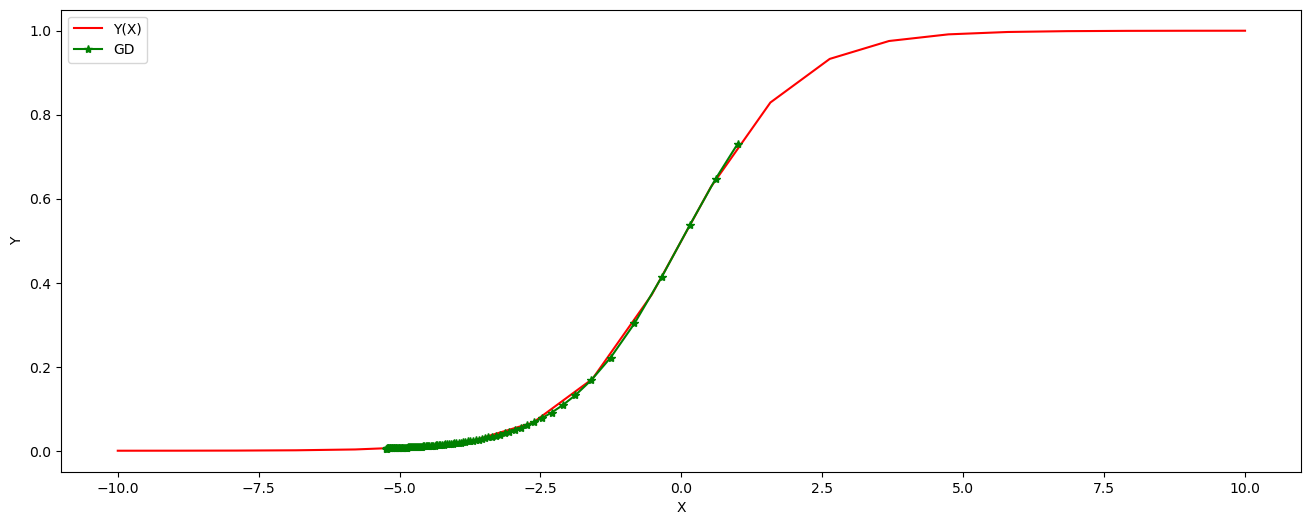

In [265]:
# первоначальное точка
start_point = 1

# размер шага (learning rate)
learning_rate = 2

# начальная точка
next_point = start_point

x = []
x.append(next_point)

plt.figure(figsize=(16, 6))
plt.plot(X, Y, 'r', label='Y(X)')

# количество итерация 
n = 100
for i in range(n):
    current_point = next_point

    # движение в негативную сторону вычисляемого градиента
    next_point = current_point - learning_rate * gr_func(current_point)
    x.append(next_point)                                    

    # остановка когда достигнута необходимая степень точности
    print(f"Итерация: {i}")
    print(f"Текущая точка {current_point}| Следующая точка {next_point}")
    print("--------------------------------------------------------")
    
    

print(f"минимум {next_point}, количество затраченных итераций: {i}") 
X_grad = np.array(x)
plt.plot(X_grad, func(X_grad), '-*g', label = 'GD')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
#попробую сделать функцию с передаваемыми значениями X и Y
def grad(X, Y):
    # первоначальное точка
    start_point = 1

    # размер шага (learning rate)
    learning_rate = 2

    # начальная точка
    next_point = start_point

    x = []
    x.append(next_point)

    plt.figure(figsize=(16, 6))
    plt.plot(X, Y, 'r', label='Y(X)')

    # количество итерация 
    n = 100
    for i in range(n):
        current_point = next_point

        # движение в негативную сторону вычисляемого градиента
        next_point = current_point - learning_rate * func(current_point)
        x.append(next_point)                                    

        # остановка когда достигнута необходимая степень точности
        print(f"Итерация: {i}")
        print(f"Текущая точка {current_point}| Следующая точка {next_point}")
        print("--------------------------------------------------------")



    print(f"минимум {next_point}, количество затраченных итераций: {i}") 
    X_grad = np.array(x)
    plt.plot(X_grad, func(X_grad), '-*g', label = 'GD')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

Реализуем две функции:
1. mserror - функция среднеквадратичной ошибки $MSE = \frac{1}{n}\sum_{i=0}^n{(\text{y}_i-\text{y_pred}_i})^2 = \frac{1}{n}\sum_{i=0}^n{(\text{y}_i-(w_1\cdot X_i + w_0)})^2 = \frac{1}{n}\sum_{i=0}^n{(\text{y}_i-w_1\cdot X_i - w_0})^2$


2. gr_mserror - градиент функции MSE. Распишем его отдельно для коэффициента сдвига и коэффициента наклона:

Сдвиг:
$\frac{∂ MSE}{∂ w_0} = \frac{1 \cdot 2}{n}\sum({y_i -\text{y_pred}_i})\cdot -1$

Наклон:
$\frac{∂ MSE}{∂ w_1} = \frac{1 \cdot 2}{n}\sum({y_i -\text{y_pred}_i})\cdot -X$

In [271]:
from sklearn.datasets import make_regression
X, y, coeffs = make_regression(n_samples=50, n_features=1, n_informative=1,
                               noise=10, coef=True, random_state=11)

display(X, y)

array([[ 0.63007982],
       [-1.06163445],
       [ 0.29634711],
       [ 1.40277112],
       [ 0.68968231],
       [-0.53662936],
       [-1.11947526],
       [ 1.06755846],
       [ 0.1178195 ],
       [ 1.54907163],
       [ 1.29561858],
       [-0.03107509],
       [ 0.56119218],
       [ 0.42105072],
       [-0.4864951 ],
       [ 0.08897764],
       [-0.18577532],
       [-0.17809318],
       [-0.23725045],
       [-0.88623967],
       [-0.47573349],
       [ 0.21734821],
       [-2.65331856],
       [ 0.72575222],
       [-0.38053642],
       [-0.48456513],
       [ 1.57463407],
       [-1.30554851],
       [-0.17241977],
       [ 0.73683739],
       [-1.23234621],
       [ 0.31540267],
       [ 1.74945474],
       [ 0.09183837],
       [-0.30957664],
       [-1.18575527],
       [-0.68344663],
       [-0.31963136],
       [-0.00828463],
       [-0.64257539],
       [ 1.0956297 ],
       [ 0.06367166],
       [-0.57395456],
       [ 0.07349324],
       [ 0.73227135],
       [-1

array([  43.6543408 ,  -72.68235021,   21.19644643,  107.58765071,
         69.62063217,  -32.57566222, -101.61213107,   87.44514699,
         17.69898683,  131.00190463,   97.97802247,    2.70819092,
         52.42715419,   27.74476129,  -31.82947365,    1.58209228,
         -9.72570848,    4.57391214,  -33.24586607,  -74.34292886,
        -22.6419015 ,   15.84607909, -202.79645668,   49.05026172,
        -34.9916168 ,  -33.95608308,  121.78273292, -123.72382672,
         -1.90918067,   64.06753923,  -91.73785524,    9.55252237,
        148.12427806,   22.21183346,  -16.35144507, -113.95075954,
        -47.70966758,  -22.69082132,   -1.79022499,  -58.17761844,
         91.76970817,  -12.7798199 ,  -38.1435921 ,   17.48650737,
         40.52468632, -107.65815151, -134.20798669, -127.22516755,
        -34.31360406,  -10.90920383])

In [268]:
# функция, определяющая среднеквадратичную ошибку, w1 и w0 коэф сдвига и наклона
def mserror(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    return np.sum((y - y_pred) ** 2) / len(y_pred)

# функция градиента
def gr_mserror(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    return np.array([2/len(X)*np.sum((y - y_pred)) * (-1),
                     2/len(X)*np.sum((y - y_pred) * (-X[:, 0]))])

In [272]:
# установка минимального значения, на которое должны изменяться веса
eps = 0.0001

# первоначальное точка
w1 = 0
w0 = 0

# размер шага (learning rate)
learning_rate = 0.1

next_w1 = w1
next_w0 = w0
# количество итерация 
n = 100
for i in range(n):
    cur_w1 = next_w1
    cur_w0 = next_w0

    # движение в негативную сторону вычисляемого градиента
    next_w0 = cur_w0 - learning_rate * gr_mserror(X, cur_w1, cur_w0, y)[0]
    next_w1 = cur_w1 - learning_rate * gr_mserror(X, cur_w1, cur_w0, y)[1]

    # остановка когда достигнута необходимая степень точности
    print(f"Итерация: {i}")
    print(f"Текущая точка {cur_w1, cur_w0}| Следующая точка {next_w1, next_w0}")
    print(f"MSE {mserror(X, cur_w1, cur_w0, y)}")
    print("--------------------------------------------------------")
    
    if (abs(cur_w1 - next_w1) <= eps) and (abs(cur_w0 - next_w0) <= eps):
        break

Итерация: 0
Текущая точка (0, 0)| Следующая точка (13.245106098282543, -1.3921748530551812)
MSE 5436.432058517568
--------------------------------------------------------
Итерация: 1
Текущая точка (13.245106098282543, -1.3921748530551812)| Следующая точка (24.283455474773014, -2.270634896573517)
MSE 3812.4417335187304
--------------------------------------------------------
Итерация: 2
Текущая точка (24.283455474773014, -2.270634896573517)| Следующая точка (33.487719285860635, -2.777322881591963)
MSE 2689.1325642433894
--------------------------------------------------------
Итерация: 3
Текущая точка (33.487719285860635, -2.777322881591963)| Следующая точка (41.166652649401456, -3.0191730536904307)
MSE 1910.2491839412482
--------------------------------------------------------
Итерация: 4
Текущая точка (41.166652649401456, -3.0191730536904307)| Следующая точка (47.57624618267611, -3.0762482285482444)
MSE 1368.9634120527255
--------------------------------------------------------
Итерац